## Mahmoud Emara
### In class Exercise 2

### Generation of random data

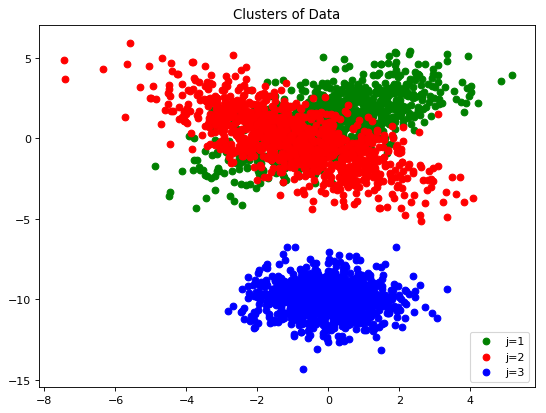

In [28]:
import numpy as np
import math
import matplotlib.pyplot as plt

mu1 = np.array([0, 1])
mu2 = np.array([-1,0])
mu3 = np.array([0,-10])

U = np.matrix([[(1/math.sqrt(2)), -1/math.sqrt(2)],[(1/math.sqrt(2)), (1/math.sqrt(2))]])
lambda1 = np.matrix([[4,0],[0,1]])
lambda2 = np.matrix([[1,0],[0,5]])

sigma1 = (U@lambda1)@U.T
sigma2 = U@lambda2@U.T
sigma3 = np.identity(2)

dataset1 = np.random.multivariate_normal(mu1, sigma1, 1000)
dataset2 = np.random.multivariate_normal(mu2, sigma2, 1000)
dataset3 = np.random.multivariate_normal(mu3, sigma3, 1000)

plt.figure(figsize=(8,6), dpi= 80, facecolor='w', edgecolor='k')
plot1 = plt.scatter(dataset1.T[0], dataset1.T[1], color='g', label='j=1')
plot2 = plt.scatter(dataset2.T[0], dataset2.T[1], color='r', label='j=2')
plot3 = plt.scatter(dataset3.T[0], dataset3.T[1], color='b', label='j=3')
plt.title('Clusters of Data')
plt.legend(handles = [plot1, plot2, plot3], loc='lower right')
plt.show()


### K-Means Clustering

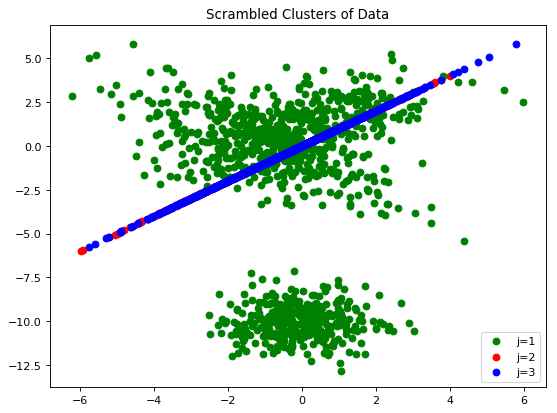

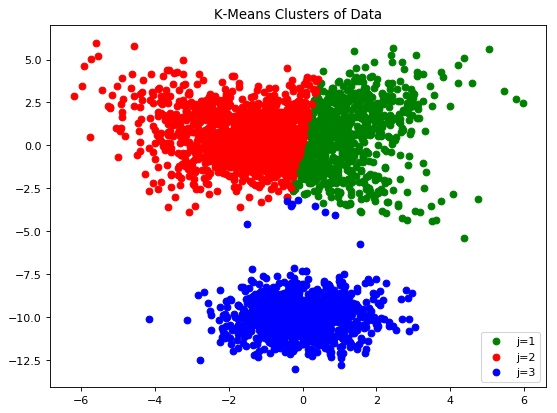

In [27]:
# k-Means clustering k = 3

# Randomly assign datasets
def randomAssign(data):
    class1 = np.array([[],[]])
    class2 = np.array([[],[]])
    class3 = np.array([[],[]])
    for i in data:
        random = (int)(np.random.rand()*3)
        i = np.array([i]).T
        if random == 0:
            class1 = np.hstack((class1, i))
        if random == 1:
            class2 = np.hstack((class2, i))
        if random == 2:
            class3 = np.hstack((class3, i))
    return class1, class2, class3

data1_1, data1_2, data1_3 = randomAssign(dataset1) 
data2_1, data2_2, data2_3 = randomAssign(dataset2) 
data3_1, data3_2, data3_3 = randomAssign(dataset3) 

# print("Data 1:",data1_1.shape, data2_1.shape, data3_1.shape)
# print("Data 2:",data1_2.shape, data2_2.shape, data3_2.shape)
# print("Data 3:",data1_3.shape, data2_3.shape, data3_3.shape,'\n')

class1Data = np.column_stack((data1_1, data2_1, data3_1))
class2Data = np.column_stack((data1_2, data2_2, data3_2))
class3Data = np.column_stack((data1_3, data2_3, data3_3))

plt.figure(figsize=(8,6), dpi= 80, facecolor='w', edgecolor='k')
plot1 = plt.scatter(class1Data[0], class1Data[1], color='g', label='j=1')
plot2 = plt.scatter(class2Data[0], class2Data[0], color='r', label='j=2')
plot3 = plt.scatter(class3Data[0], class3Data[0], color='b', label='j=3')
plt.title('Scrambled Clusters of Data')
plt.legend(handles = [plot1, plot2, plot3], loc='lower right')
plt.show()  

#print(class1Data.shape); print(class2Data.shape); print(class3Data.shape)

def calcDist(var1x, var1y, var2x, var2y):
    a = (var2y - var1y)**2
    b = (var2x - var1x)**2
    distance = math.sqrt(a+b)
    return distance

stop = False
while stop == False: 
    cent1x = np.mean(class1Data[0]); cent1y = np.mean(class1Data[1])
    cent2x = np.mean(class2Data[0]); cent2y = np.mean(class2Data[1])
    cent3x = np.mean(class3Data[0]); cent3y = np.mean(class3Data[1])
    
    newClass1x = []; newClass1y = []
    newClass2x = []; newClass2y = []
    newClass3x = []; newClass3y = []
    
    for i in range(len(class1Data[0])):
        dist1 = calcDist(class1Data.T[i][0], class1Data.T[i][1], cent1x, cent1y)
        dist2 = calcDist(class1Data.T[i][0], class1Data.T[i][1], cent2x, cent2y)
        dist3 = calcDist(class1Data.T[i][0], class1Data.T[i][1], cent3x, cent3y)
        distArr = [dist1,dist2,dist3]
        
        if(np.min(distArr) == dist1):
            newClass1x.append(class1Data.T[i][0])
            newClass1y.append(class1Data.T[i][1])
        if(np.min(distArr) == dist2):
            newClass2x.append(class1Data.T[i][0])
            newClass2y.append(class1Data.T[i][1])
        if(np.min(distArr) == dist3):
            newClass3x.append(class1Data.T[i][0])
            newClass3y.append(class1Data.T[i][1])
            
    for i in range(len(class2Data[0])):
        dist1 = calcDist(class2Data.T[i][0], class2Data.T[i][1], cent1x, cent1y)
        dist2 = calcDist(class2Data.T[i][0], class2Data.T[i][1], cent2x, cent2y)
        dist3 = calcDist(class2Data.T[i][0], class2Data.T[i][1], cent3x, cent3y)
        distArr = [dist1,dist2,dist3]
        if(np.min(distArr) == dist1):
            newClass1x.append(class2Data.T[i][0])
            newClass1y.append(class2Data.T[i][1])
        if(np.min(distArr) == dist2):
            newClass2x.append(class2Data.T[i][0])
            newClass2y.append(class2Data.T[i][1])
        if(np.min(distArr) == dist3):
            newClass3x.append(class2Data.T[i][0])
            newClass3y.append(class2Data.T[i][1])
            
    for i in range(len(class3Data[0])):
        distArr = []
        dist1 = calcDist(class3Data.T[i][0], class3Data.T[i][1], cent1x, cent1y)
        dist2 = calcDist(class3Data.T[i][0], class3Data.T[i][1], cent2x, cent2y)
        dist3 = calcDist(class3Data.T[i][0], class3Data.T[i][1], cent3x, cent3y)
        distArr = [dist1,dist2,dist3]
        if(np.min(distArr) == dist1):
            newClass1x.append(class3Data.T[i][0])
            newClass1y.append(class3Data.T[i][1])
        if(np.min(distArr) == dist2):
            newClass2x.append(class3Data.T[i][0])
            newClass2y.append(class3Data.T[i][1])
        if(np.min(distArr) == dist3):
            newClass3x.append(class3Data.T[i][0])
            newClass3y.append(class3Data.T[i][1])
            
    if not (np.array_equal(newClass1x, class1Data[0]) and not np.array_equal(newClass2x, class2Data[0]) and not np.array_equal(newClass3x, class3Data[0])):
        stop = True
    
plt.figure(figsize=(8,6), dpi= 80, facecolor='w', edgecolor='k')
plot1 = plt.scatter(newClass1x, newClass1y, color='g', label='j=1')
plot2 = plt.scatter(newClass2x, newClass2y, color='r', label='j=2')
plot3 = plt.scatter(newClass3x, newClass3y, color='b', label='j=3')
plt.title('K-Means Clusters of Data')
plt.legend(handles = [plot1, plot2, plot3], loc='lower right')
plt.show()  